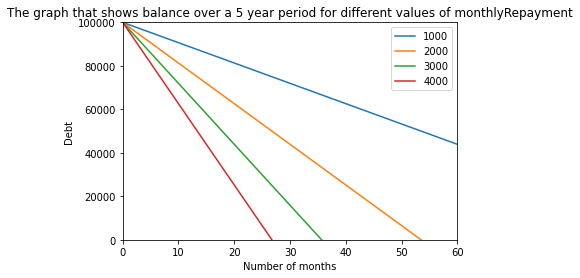

1000: Repayment in 9 year and 0 months
2000:Repayment in 4 year and 7 months
3000:Repayment in 3 year and 1 months
4000:Repayment in 2 year and 4 months


In [23]:
import matplotlib.pyplot as plt
import numpy as np



'''Algorithm I am required to sketch a graph base on the given statement
debfund=R100000,
MonthlyRepayment made on 1st of each month
interestRate=6.5% each month

Solution

We have 12 months in a year so debtFund=1000000/12
'''
#b.creating a loop that will control our program execution
#The x-axis start from 0 and below 60 from the given graph
#The method for computing the interest,returning a float value
def intrestPerMonth(amount: float)->float:
    return amount - (0.065 * amount)
#The method for computing the balance and return months,interest as a tuple
def payments(amount: float)-> tuple:
    intrest = list([100_000])
    months = list([0])
    k = 0
    while True:
        balance = intrest[-1] - intrestPerMonth(amount)
        intrest.append(balance)
        k += 1
        months.append(k)
        if balance <= 0:
            break
        
    return months, intrest

#I jst make my code short and simple by introducing the asterick below
plt.plot(*payments(1_000.00),label="1000")
plt.plot(*payments(2_000.00),label="2000")
plt.plot(*payments(3_000.00),label="3000")
plt.plot(*payments(4_000.00),label="4000")#For the legend distiguishin label is required so much

plt.legend()
plt.ylim((0, 100_000.00)) #The y-label start at zero and end up to 100_000.00
plt.xlim((0, 60)) #The x-label Start at zero and end at 60
plt.title("The graph that shows balance over a 5 year period for different values of monthlyRepayment")
plt.ylabel("Debt")
plt.xlabel("Number of months")
axe=plt.gca()#manipulate the axis of graph  to be shifted upwards
plt.show()


# b.The method that compute "Repayment in ... year and ... months"
#returning a tuple

def months_and_years(m:int)->tuple:
    return m//12, m%12
    #my code is simple I just did string manipulation to display output
y, m = months_and_years(len(payments(1_000.00)[0]))
print(f"1000: Repayment in {y} year and {m} months")
y, m = months_and_years(len(payments(2_000.00)[0]))
print(f"2000:Repayment in {y} year and {m} months")
y, m = months_and_years(len(payments(3_000.00)[0]))
print(f"3000:Repayment in {y} year and {m} months")
y, m = months_and_years(len(payments(4_000.00)[0]))
print(f"4000:Repayment in {y} year and {m} months")

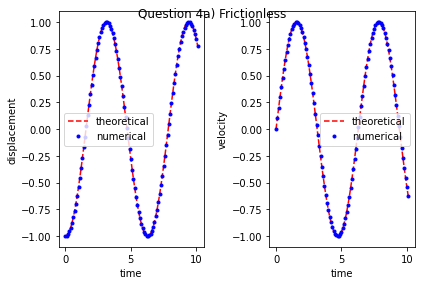

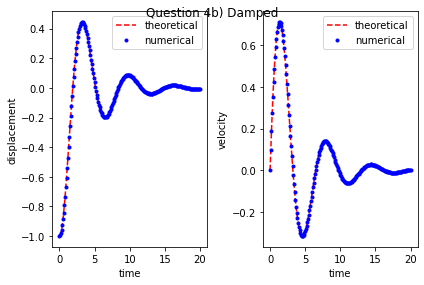

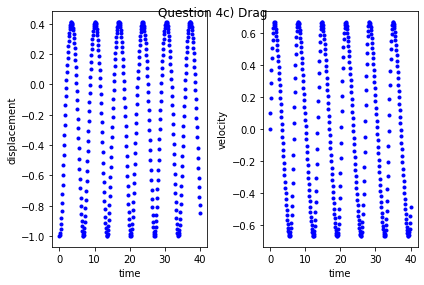

In [21]:


import numpy as np
import matplotlib.pyplot as plt


kappa = 1
gamma = 0.5
eta = 1

# dx/dt = v and 1/2 dv/dt= -kappa*x
def dudt_a(u, t = 0):
    return np.array([u[1],-kappa*u[0]])

# dx/dt = v and 1/2 dv/dt= -kappa*x -gamma v
def dudt_b(u, t = 0):
    return np.array([u[1],-kappa*u[0]-gamma*u[1]])

# dx/dt = v and 1/2 dv/dt= -kappa*x - eta v^2
def dudt_c(u, t = 0):
    return np.array([u[1],-kappa*u[0]-eta*u[1]**2]) 
    # Mistake in the question, drag force shoudl have been proportional to v^2 but always apposing the motion
    # As long and v^2 appeared you would recieve a mark
    #return np.array([u[1],-kappa*u[0]-eta*u[1]*np.abs(u[1])])


def RK4(h,f,t_n,u_n):
    k1 = h*f(u_n,      t_n)
    k2 = h*f(u_n+k1/2, t_n+h/2)
    k3 = h*f(u_n+k2/2, t_n+h/2)
    k4 = h*f(u_n+k3,   t_n+h)
    
    return u_n+1/6*(k1+2*k2+2*k3+k4)


# Question 1a)
# intial conditions
t_n = 0
u_n = np.array([-1,0])
h = 0.1

u = []
u.append(u_n)
t = []
t.append(t_n)

# loop until max time and keeping track of all u_n (position and velcoity) at times t_n
while t_n < 10:
    
    # Question 4a)
    u_n = RK4(h,dudt_a,t_n,u_n)

    t_n = t_n + h
    
    u.append(u_n)
    t.append(t_n)
   
u = np.asarray(u)
t = np.asarray(t)

# Theoretical curve
phi_0 = np.arctan2(u[0,1],-np.sqrt(kappa)*u[0,0])
x_th = u[0,0]/np.cos(phi_0)*np.cos(np.sqrt(kappa)*t+phi_0)
v_th = -np.sqrt(kappa)*u[0,0]/np.cos(phi_0)*np.sin(np.sqrt(kappa)*t+phi_0)


fig = plt.figure()
fig.suptitle('Question 4a) Frictionless')
ax = fig.subplots(1, 2)
ax[0].plot(t,x_th,'--r',label='theoretical')
ax[0].plot(t,u[:,0],'.b',label='numerical')
ax[0].set_xlabel('time')
ax[0].set_ylabel('displacement')
ax[0].legend()

ax[1].plot(t,v_th,'--r',label='theoretical')
ax[1].plot(t,u[:,1],'.b',label='numerical')
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')
ax[1].legend()

plt.tight_layout()


#################################

# Question 1b)

t_n = 0
u_n = np.array([-1,0])
h = 0.1

u = []
u.append(u_n)
t = []
t.append(t_n)

while t_n < 20:
    u_n = RK4(h,dudt_b,t_n,u_n)
    t_n = t_n + h
    
    u.append(u_n)
    t.append(t_n)
   
u = np.asarray(u)
t = np.asarray(t)

# Theoretical curve
phi_0 = np.arctan2(-gamma/2-u[0,1]/u[0,0],np.sqrt(kappa-gamma**2/4))
x_th = u[0,0]/np.cos(phi_0)*np.exp(-gamma/2*t)*np.cos(np.sqrt(kappa-gamma**2/4)*t+phi_0)
v_th = -gamma/2*u[0,0]/np.cos(phi_0)*np.exp(-gamma/2*t)*np.cos(np.sqrt(kappa-gamma**2/4)*t+phi_0)\
    - np.sqrt(kappa-gamma**2/4)*u[0,0]/np.cos(phi_0)*np.exp(-gamma/2*t)*np.sin(np.sqrt(kappa-gamma**2/4)*t+phi_0)

fig = plt.figure()
fig.suptitle('Question 4b) Damped')
ax = fig.subplots(1, 2)
ax[0].plot(t,x_th,'--r',label='theoretical')
ax[0].plot(t,u[:,0],'.b',label='numerical')
ax[0].set_xlabel('time')
ax[0].set_ylabel('displacement')
ax[0].legend()

ax[1].plot(t,v_th,'--r',label='theoretical')
ax[1].plot(t,u[:,1],'.b',label='numerical')
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')
ax[1].legend()
plt.tight_layout()


#################################


# Question 1c)

t_n = 0
u_n = np.array([-1,0])
h = 0.1

u = []
u.append(u_n)
t = []
t.append(t_n)

while t_n < 40:
    u_n = RK4(h,dudt_c,t_n,u_n)
    t_n = t_n + h
    
    u.append(u_n)
    t.append(t_n)
   
u = np.asarray(u)
t = np.asarray(t)

fig = plt.figure()
fig.suptitle('Question 4c) Drag')
ax = fig.subplots(1, 2)
ax[0].plot(t,u[:,0],'.b',label='numerical')
ax[0].set_xlabel('time')
ax[0].set_ylabel('displacement')

ax[1].plot(t,u[:,1],'.b',label='numerical')
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')


plt.tight_layout()

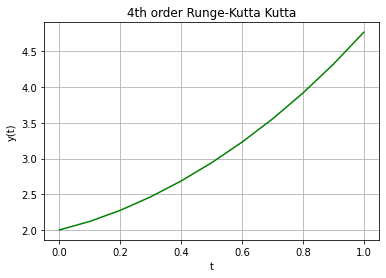

In [1]:

import matplotlib.pyplot as plt1;import matplotlib.pyplot as plt2


# function to form and return the two 1st-order ODE simulteneous equations
def f(y,z):
    
    dydt = z;
    dzdt = 3*y - 2*z;

    return dydt,dzdt

# funcion to map the output of funtion f() to only y
def fy(y,z):
    [dydt,dzdt] = f(y,z)
    return dydt

# funcion to map the output of funtion f() to only z
def fz(y,z):
    [dydt,dzdt] = f(y,z)
    return dzdt   


# setting the necessary constants
h = 0.1
tmin = 0; tmax = 1;
n = int((tmax-tmin)/h);
y0 = 2; z0 = 1;

# setting initial conditions
y = [];z = []; t=[]
t.append(tmin);
y.append(y0);
z.append(z0);

for i in range(n):
    
    yK1 = h*fy(y[i],z[i])
    zK1 = h*fz(y[i],z[i])

    yK2 = h*fy(y[i]+yK1/2,z[i]+zK1/2)
    zK2 = h*fz(y[i]+yK1/2,z[i]+zK1/2)

    yK3 = h*fy(y[i]+yK2/2, z[i]+zK2/2)
    zK3 = h*fz(y[i]+yK2/2, z[i]+zK2/2)

    yK4 = h*fy(y[i]+yK3,z[i]+zK3)
    zK4 = h*fz(y[i]+yK3,z[i]+zK3)

    ytemp = y[i] + yK1/6 + yK2/3 + yK3/3 + yK4/6
    ztemp = z[i] + zK1/6 + zK2/3 + zK3/3 + zK4/6

  
# update the y and z vectors
    y.append(ytemp)
    z.append(ztemp)

# update the time vector
    ttemp = t[i]+ h;
    t.append(ttemp)

plt2.figure(2)
plt2.plot(t,y,'g-')
#plt2.plot(t,z,'r-')
plt2.xlabel('t');plt2.ylabel('y(t)'),plt2.title('4th order Runge-Kutta Kutta')
plt2.grid()
plt1.show();plt2.show()

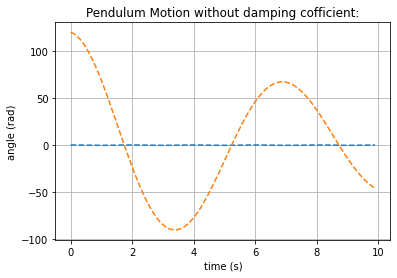

In [3]:

import numpy as np
import matplotlib.pyplot as plt


# setting the necessary constants
h = 0.1
t0 = 0; 
tmax = 30;
#n = int((tmax-tmin)/h);
N = 100
L = 12;


v0 = 0;
g = 9.8
m = 3.0
k = 0.5
w0 = np.sqrt(g/L)
X = k/(2*m*w0)

cycle = 10.0
t = np.arange(0, cycle, h)
# step height h 
n = len(t) 
thetha0 = 0
thetha1 = 10.0
s0 = L*thetha1; 

y=np.zeros(n)
v=np.zeros(n)
def accel(theta):
    return -g*np.sin(theta)
y[0] = np.radians(thetha1) 
v[0] = np.radians(0.0)

for i in range(0, n-1): 
    k1y = h*v[i]
    k1v = h*accel(y[i])

    k2y = h*(v[i]+0.5*k1v)
    k2v = h*accel(y[i]+0.5*k1y)

    k3y = h*(v[i]+0.5*k2v)
    k3v = h*accel(y[i]+0.5*k2y)

    k4y = h*(v[i]+k3v)
    k4v = h*accel(y[i]+k3y)

    # Update next value of y 
    y[i+1] = y[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6.0 
    v[i+1] = v[i] + (k1v + 2 * k2v + 2 * k3v + k4v) / 6.0

s_theo = s0*np.exp(-X*w0*t)*np.cos(w0*t*np.sqrt(1-X**2))
#plt.plot(t,s_theo,linestyle='--',label='theoritical solution with dumping')

plt.plot(t, y,t,s_theo,linestyle='--')
plt.title('Pendulum Motion without damping cofficient:')
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.grid(True)
plt.show()

#%%

#Plots with dampind coeeficients

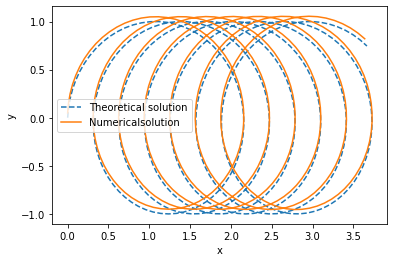

In [6]:

import numpy as np
import matplotlib.pyplot as plt

#set parameters and constants

x = 0
y = 0

vx0 = 0
vy0 = 1

Ey = 0.05
dt = 0.1
N  = 400 #time steps
#tmax = 30
t = np.linspace(0,400*dt,N) #time interval

#ploting theoretical solution

x_theo = 1 + Ey*t - np.cos(t)

y_theo = np.sin(t)


#plt.plot(x_theo,y_theo)
plt.plot(x_theo,y_theo, '--',label = "Theoretical solution")
#%%

####numerical soution

#Leap-frog initial step

x_half = x + 0.5*dt*vx0
y_half = y + 0.5*dt*vy0

x_new = [x_half]
y_new = [y_half]


#loop for applying MidPoint Method
for i in range(N-1):
    vx_half = vx0 + 0.5*dt*vy0
    vy_half = vy0 + 0.5*dt*(Ey - vx0)
    
    vx1 = vx0 + dt*vy_half
    vy1 = vy0 + dt*(Ey - vx_half)
    
    x_half += dt*vx1
    y_half += dt*vy1
    
    x_new.append(x_half)
    y_new.append(y_half)
    
    vx0 = vx1
    vy0 = vy1
    

plt.plot(x_new,y_new, label ="Numericalsolution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


a=1/(np.exp(1)) #value of alpha


A0= np.sin(a*np.pi)/(a*np.pi)  #A0

m=2*a/(np.pi) #constant multiplying the series

x=np.linspace(-np.pi,np.pi,1000)  #x-interval, take infinity value = 1000

f1=np.zeros(1000)
f5=np.zeros(1000)
f10=np.zeros(1000)
f = np.zeros(1000)
#series with n =1
f1= A0 + m*(-1)**2*((-np.sin(a*np.pi))/(a**2-1**2))*np.cos(x)
#series with n =5
f5= A0 + m*(-1)**5*((-np.sin(5*a*np.pi))/(a**2- 5**2))*np.cos(5*x)
#series with n =10
f10=A0 + m*(-1)**10*((np.sin(10*a*np.pi))/(a**2 - 10**2))*np.cos(10*x)

f = np.cos(a*x)  #Given function of x

#adjusting subplots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

#ploting on subplots f(x) for different ns
plt.subplot(2,2,1)
plt.plot(x,f, x,f1,'--')
plt.legend(['f(x)', "FS, n =1"])
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2,2,2)
plt.plot(x,f,x,f5, '--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['f(x)', "FS, n =5"])
plt.subplot(2,2,3)
plt.plot(x,f, x,f10,'--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['f(x)', "FS, n =10"])

#%%
plt.plot(x,f)
plt.show()

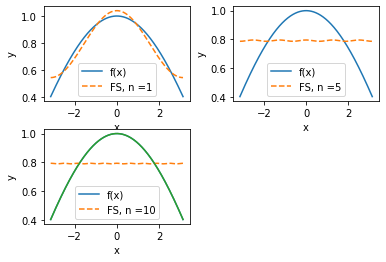

In [10]:

import numpy as np
import matplotlib.pyplot as plt


a=1/(np.exp(1)) #value of alpha


A0= np.sin(a*np.pi)/(a*np.pi)  #A0

m=2*a/(np.pi) #constant multiplying the series

x=np.linspace(-np.pi,np.pi,1000)  #x-interval, take infinity value = 1000

f1=np.zeros(1000)
f5=np.zeros(1000)
f10=np.zeros(1000)
f = np.zeros(1000)
#series with n =1
f1= A0 + m*(-1)**2*((-np.sin(a*np.pi))/(a**2-1**2))*np.cos(x)
#series with n =5
f5= A0 + m*(-1)**5*((-np.sin(5*a*np.pi))/(a**2- 5**2))*np.cos(5*x)
#series with n =10
f10=A0 + m*(-1)**10*((np.sin(10*a*np.pi))/(a**2 - 10**2))*np.cos(10*x)

f = np.cos(a*x)  #Given function of x

#adjusting subplots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

#ploting on subplots f(x) for different ns
plt.subplot(2,2,1)
plt.plot(x,f, x,f1,'--')
plt.legend(['f(x)', "FS, n =1"])
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2,2,2)
plt.plot(x,f,x,f5, '--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['f(x)', "FS, n =5"])
plt.subplot(2,2,3)
plt.plot(x,f, x,f10,'--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['f(x)', "FS, n =10"])

#%%
plt.plot(x,f)
plt.show()

In [16]:
#Question one 
#prompt the user to enter the initial guess
x=float(input("enter your estimation for the roots "))
a=float(input("Enter the value of a : "))
b=float(input("Enter the value of b : "))
c=float(input("Enter the value of c : "))

#defining two functions given one f1 and f2 simultaneoulsy with their derivatives to be used in the Newton raphson formula
func1=lambda x:x**2 - 4
func1_der=lambda x:2*x
func2=lambda x:x**2-2*x+2
func2_der=lambda x:2*x-2

#set tol
tolarence =  0.01
n=0
i=0
#set guess
initial_guess=x 

#the function that will iterate until the error <  toleranced
def Newtown_Raphson(f, dfdx, x0, tol):                           
    if abs(f(x0)) < tol:
        return x0
    else:
        return Newtown_Raphson(f, dfdx, x0 - f(x0)/dfdx(x0), tol)#recursive function

while abs(func1(initial_guess)) > tolarence :
    i =i+1 #for increment
    # Newton-Raphson formula
    xi = initial_guess-func1(initial_guess)/func1_der(initial_guess)  
    initial_guess = xi
    print(f"{i} The error is {abs(func1_der(initial_guess))}")

def Newtown_Raphson(fn,x,tol=0.01,N_step=100):
  for i in range(N_step):
    xn=x-fn[0](x)/fn[1](x)
    if abs(xn-x)<tol:
      break
      x=xn
      return xn,i

y =[ lambda x:x**2-2*x+2,lambda x:2*x-2]

print(Newtown_Raphson(y,5),Newtown_Raphson(y,5))


#for discriminant
if b**2-4*a*c<0:
  print("Roots are imaginary.’")

enter your estimation for the roots 0.2
Enter the value of a : 2
Enter the value of b : 5
Enter the value of c : 6
1 The error is 20.199999999999996
2 The error is 10.496039603960394
3 The error is 6.010212047994725
4 The error is 4.33617386921077
5 The error is 4.013031404384242
6 The error is 4.000021158257077
None None
Roots are imaginary.’


In [17]:
#c=float(input('number? '))
#a=float(input('first initial guess  '))
#b=float(input('second initial guess '))
def Newtown_Raphson(fn,x,tol=0.01,N_step=100):
  for i in range(N_step):
    xn=x-fn[0](x)/fn[1](x)
    if abs(xn-x)<tol:
      break
      x=xn
      return xn,i #return tuple like (x,y)
if b**2-4*a*c<0:
  print("Roots are imaginary.’")
y =[ lambda x:x**2-2*x+2,lambda x:2*x-2]

print(Newtown_Raphson(y,10),Newtown_Raphson(y,10))

Roots are imaginary.’
None None


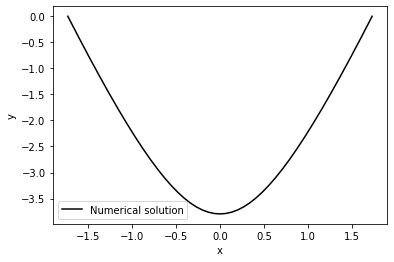

In [14]:
#Question 2
import numpy as np
import matplotlib.pyplot as plt

#set parameters and constants
#separating horizontal distance
D = 10 
#angle of rope from horizintal point A in radians 
theta = np.radians(60) 
k = (2*np.arcsinh(np.tan(theta)))/D # k value
#step size
h = 0.25 
#total step
N = 40   
xn = np.linspace(0,N*h, N)

#defining a function to find du/dx
def f(u):
    x,s = u #exact x,s
    return np.array([s, k*np.sqrt(1+s**2)]) #return derivatives


#numerical differentiation:
#Ininitialize u0    
u0 = np.array([0, -np.tan(theta)]) 
#initialize u_n+1
u_n = u0 + h*f(u0)     
#list to store x
x = [u0[0]] 
#list to store s
y = [u0[1]] 

#loop to implement algorithm from 1 to 40 steps
for i in range(1,N+1):
    u_n = u0 + h*f(u0) 
    #find un using given formula (u0 ats as un)
    u1 = u0 + 0.5*h*(f(u0) + f(u_n)) 
     #set u_n to u0 for nexr iteration
    u_n = u0 
    u0 = u1  #set u0 to u1 for next iteration
    
    y.append(u1[1]) #add new coordinates to list
    x.append(u1[0]) #add new coordinates to list
#u = (1/k)* (np.cosh(k*(x - D)) - np.cosh(0.5*k*D)) #I decided to comment out u for now
plt.plot(y,x,'-k', label = 'Numerical solution') #plot with solid black line

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()